In [1]:
include("../src/cheby_sampler_dw.jl")
include("../src/data_generation.jl")
using BenchmarkTools, IterativeSolvers, Random, LinearAlgebra, SparseArrays, DataFrames

include group.jl for user defined matrix generators
verify download of index files...
used remote site is https://sparse.tamu.edu/?per_page=All
populating internal database...


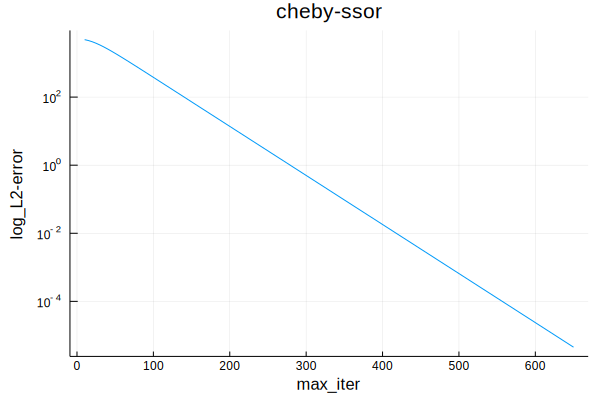

In [2]:
Random.seed!(111)
n = 10
A = gen_A(n)
b = randn(n^2);

xtrue = A \ b;
λ_max,λ_min = eigMm(A, 1.6641)

gap = 5
iternums = 130
iterationgrid = collect(10: gap: gap * iternums)  # x-axis of the plot
errorpath = zeros(length(iterationgrid)) # L1-error at iterationgrid
for i in 1:length(iterationgrid)
    iter = iterationgrid[i]
    errorpath[i] = norm(xtrue - k3_CB_ssor(A, copy(b), 1.6641, λ_max, λ_min, iter));
end

using Plots; gr()
plt = Plots.plot(collect(iterationgrid), errorpath, legend=:none, yscale = :log10)
xlabel!(plt, "max_iter")
ylabel!(plt, "log_L2-error")
title!(plt, "cheby-ssor")

In [3]:
savefig(plt,"graph_chebyssor_err.png")